In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from load_data import extract_zip
from utils import split_data

### Read Data

In [ ]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
filename = 'kaggle-survey-2018.zip'
member_name = 'multipleChoiceResponses.csv'

raw = extract_zip(url, filename, member_name)
X_train, y_train, set_y = split_data(raw = raw, ycol = 'Q6')

### Correlation Matrix

#### Option 1

In [ ]:
(X_train
.assign(data_scientist = y_train == 'Data Scientist')
.corr(method='spearman')
.style
.background_gradient(cmap = 'RdBu', vmax=1, vmin=-1)
.set_sticky(axis='index')
)

#### Option 2

In [3]:
# Correlation Matrix
corr_matrix = X_train.corr(method='spearman')
styled_corr_matrix = corr_matrix.style.background_gradient(cmap='RdBu', vmax=1, vmin=-1)
styled_corr_matrix.set_properties(**{'position': 'sticky', 'top': '0'})


### Bar Plot

In [ ]:
fig, ax = plt.subplot(figsize=(8, 4))
(X_train
.assign(data_scientist = y_train)
.groupby('r')
.data_scientist
.value_counts()
.unstack()
.plot.bar(ax=ax)
)

<AxesSubplot:xlabel='major_cs'>

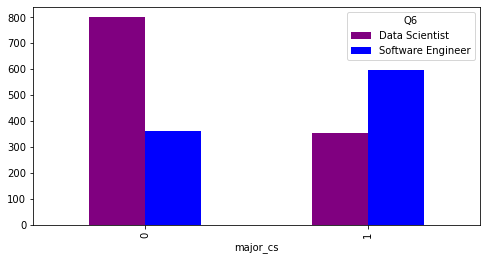

In [7]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = ['purple', 'blue']

crosstab_df = pd.crosstab(index=X_train['major_cs'], columns=set_y)

crosstab_df.plot.bar(ax=ax, color=colors)
